In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          clusters,
                          title = ''):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(clusters))
    ytick_marks = np.arange(len(classes))
    plt.xticks(xtick_marks, clusters, rotation=45)
    plt.yticks(ytick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

## LDA

In [ ]:
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

print(__doc__)
print(dataset.keys())

Automatically created module for IPython interactive environment
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
new_doc = []
for ind, doc in enumerate(dataset.data):
  print(ind)
  doc_nlp = nlp(doc)
  retain = []
  for token in doc_nlp:
    if not token.is_stop and token.is_alpha:
      if token.pos_ == "VERB" and token.dep_ != "":
        retain.append(token.text)
  new_doc.append(" ".join(retain))

In [ ]:
new_doc[:5]

['sure bashers fans pretty confused lack kind posts recent massacre Actually bit puzzled bit relieved going end non PIttsburghers relief bit praise killing Devils worse thought Jagr showed better regular season stats lot fo fun watch playoffs let lot fun couple games going beat pulp disappointed lose final regular season game',
 'brother market high performance video card supports local bus MB RAM suggestions ideas high performance VLB card post email Thank',
 'Finally said dream new area greater years holocaust numbers cold changed calendar MENTIONED TRUE LET TRUE CHILDREN GOING PAY PRICE KILLED TORTURED ARMENIANS HEARDED CALLED forgot fight forgot killings rapings torture time swedish RedCross workers lie regional killer like person shoot policy Confused Search Turkish planes know talking government announced giving weapons started attack self province search plane weapons content announced weapons confused right weapons started fight Shoot Armenian bread butter arms personel Russian

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/doc_new_v3.pkl', 'wb') as f:
  pickle.dump(new_doc, f)

In [ ]:
import pickle
file = open('/content/drive/MyDrive/Colab Notebooks/doc_new_v2.pkl','rb')
new_doc = pickle.load(file)
file.close()

In [ ]:
new_doc[:5]

[' I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his regular season stats. He is also a lot fo fun to watch in the playoffs. Bowman should let JAgr have a lot of fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final regular season game. PENS RULE!!! ',
 'My brother is in the market for a high-performance video card that supports VESA local bus with 1-2MB RAM. Does anyone have suggestions/ideas on: - Diamond Stealth Pro Local Bus - Orchid Farenheit 1280 - ATI Graphics Ultra Pro - Any other high-performance VLB card Please post or email. Thank y

In [ ]:
dataset.data[1]

In [ ]:
dataset.target_names[dataset.target[1]]

'comp.sys.mac.hardware'

In [ ]:
ind = 0
query = [dataset.data[ind]]
X_with_query = dataset.data + query

In [ ]:
len(dataset.data)

11314

In [ ]:
len(X_with_query)

11315

In [ ]:
# Helper function
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)

In [ ]:
vectorizer = TfidfVectorizer(stop_words=my_stop_words,
                             min_df=0.001,  # ignore if in less than xx % of docs
                             max_df=0.80,  # ignore if in more than xx % of docs
                             token_pattern=r'(?u)\b[A-Za-z]{3,}\b',
                             use_idf=True)

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:

min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents".
The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

https://stackoverflow.com/a/35615151

In [ ]:
# X = vectorizer.fit_transform(data)
X = vectorizer.fit_transform(dataset.data)
lda = LDA(n_components=20)
lda.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
a = lda.transform(X)
pred_labels = [np.argmax(i) for i in a]

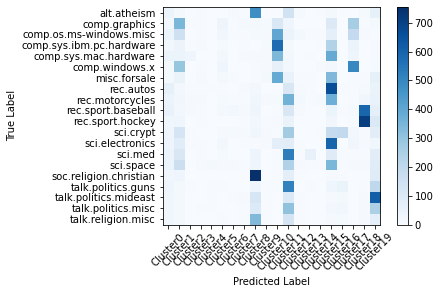

In [ ]:
clusterNames = ["Cluster%d" % i for i in range(20)]
cm = metrics.confusion_matrix(dataset.target, pred_labels)
plt.figure()
plot_confusion_matrix(cm,
                       classes=dataset.target_names,
                       clusters=clusterNames)

In [ ]:
print("Homogeneity", metrics.homogeneity_score(dataset.target, pred_labels))
print("Completeness", metrics.completeness_score(dataset.target, pred_labels))
print("NMI", metrics.normalized_mutual_info_score(dataset.target, pred_labels))
print("Purity", purity_score(dataset.target, pred_labels))

Homogeneity 0.2704965396939499
Completeness 0.34486223689900997
NMI 0.303185865874151
Purity 0.2751777565531147


In [ ]:
predPair = []
for i in range(len(dataset.data)):
  predPair.append([pred_labels[i], dataset.target[i]])

predTuple = {}
for ind in range(20):
  indClasses = []
  for i in predPair:
    if i[0] == ind:
      indClasses.append(i[1])
  predTuple[ind] = indClasses

predMax = {}
for ind in range(20):
  predMax[ind] = max(predTuple[ind], key=predTuple[ind].count)

In [ ]:
print_topics(lda, vectorizer, 10)


Topic #0:
tek yeast candida chronic syndrome manhattan blew cancer vice bronx

Topic #1:
edu mail information available software graphics space list thanks com

Topic #2:
fpu pds slot iisi nubus lciii mhz centris cpu grayscale

Topic #3:
deleted conner stuff cats legend air technician johnny nanao dir

Topic #4:
battery spacecraft orbit mars pluto mission batteries mil moon solar

Topic #5:
thanks ftp advance know site looking mail copy hello info

Topic #6:
rbi balls shafer clemens career shearson dryden metzger insisting ames

Topic #7:
just joe wax matt comp mercury curve austin hall josh

Topic #8:
god jesus people christian believe bible think say don christians

Topic #9:
address irq phone mail com modem lens contact dial email

Topic #10:
drive card windows dos scsi disk thanks mac video monitor

Topic #11:
don people just like think right know time gun good

Topic #12:
max hst patent article honda asshole rec cobb champaign hawk

Topic #13:
pitt gordon banks intellect shameful

In [ ]:
predMax

{0: 7,
 1: 1,
 2: 4,
 3: 8,
 4: 14,
 5: 1,
 6: 9,
 7: 1,
 8: 15,
 9: 6,
 10: 3,
 11: 13,
 12: 8,
 13: 13,
 14: 8,
 15: 7,
 16: 11,
 17: 5,
 18: 10,
 19: 17}

In [ ]:
for i in range(20):
  print(i, dataset.target_names[i])

0 alt.atheism
1 comp.graphics
2 comp.os.ms-windows.misc
3 comp.sys.ibm.pc.hardware
4 comp.sys.mac.hardware
5 comp.windows.x
6 misc.forsale
7 rec.autos
8 rec.motorcycles
9 rec.sport.baseball
10 rec.sport.hockey
11 sci.crypt
12 sci.electronics
13 sci.med
14 sci.space
15 soc.religion.christian
16 talk.politics.guns
17 talk.politics.mideast
18 talk.politics.misc
19 talk.religion.misc
